In [1]:
import matplotlib.pyplot as plt; 
import numpy as np; import pylab; 
import os; 
import pandas as pd
import plotly.plotly as py;
import plotly.tools as tls
from statsmodels import robust
import seaborn as sns; # Seaborn box plot for statistical annotation - * pvalue

In [2]:
# Read in data
def parse_data_CDC(file, cancer_type, metric_index):
    
    filename = os.path.join("Originals", file)
    
    data = []; cancer=[];metric=[];year=[];
    all_races=[]; caucasian=[];african_american=[];asian=[];hispanic=[];native_american=[];
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5,x6,x7,x8,x9 = data[i].split(",")  
        
        if x1 == cancer_type:
            if x2 == metric_index:
                year.append(int(x3)) 
                all_races.append(int(x4))
                
                year_sum = int(x5)+int(x6)+int(x7)+int(x8)+int(x9)
                
                caucasian.append(int(x5)/year_sum)
                african_american.append(int(x6)/year_sum)
                asian.append(int(x7)/year_sum) 
                hispanic.append(int(x8)/year_sum) 
                native_american.append(int(x9)/year_sum) 
    
    return(year, caucasian, african_american, asian, hispanic, native_american)

In [3]:
def stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, title):

    plt.bar(year,caucasian, color=[.9, .7, .7], width=1)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i]
        bar_offset.append(number)

    plt.bar(year,african_american, color=[.7, .9, .7], width=1, bottom=bar_offset)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i]
        bar_offset.append(number)

    plt.bar(year, asian, color=[.7, .7, .9], width=1, bottom=bar_offset)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i] + asian[i]
        bar_offset.append(number)

    plt.bar(year, hispanic, color=[.9, .7, .9], width=1, bottom=bar_offset)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i] + asian[i] + hispanic[i]
        bar_offset.append(number)

    plt.bar(year, native_american, color=[.9, .9, .7], width=1, bottom=bar_offset)

    plt.title(title)
    plt.xlabel('Year'); 
    plt.ylabel('Volume Fraction'); 
    plt.ylim((.7,1.01))

    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()

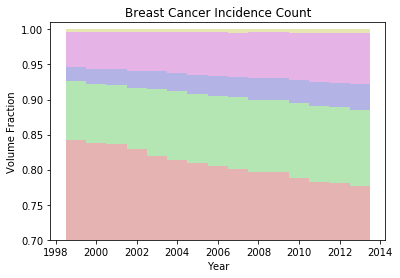

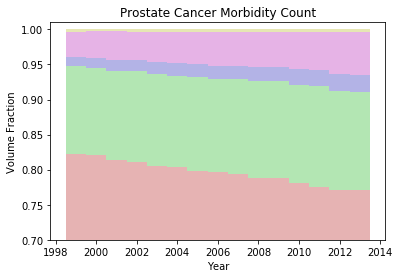

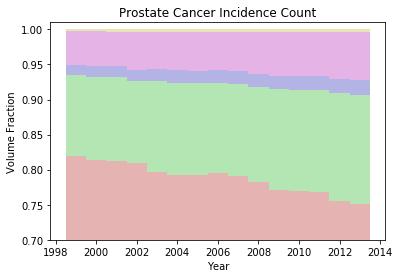

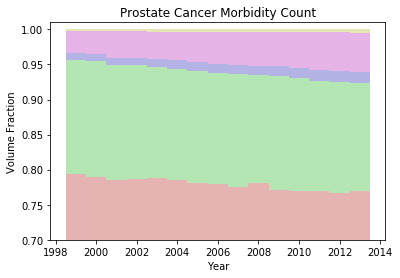

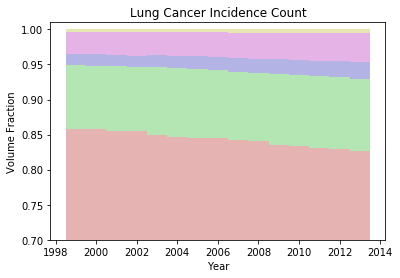

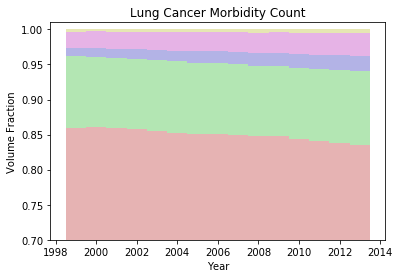

In [4]:
year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC("v01_CDC.csv","2","3")
stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, 'Breast Cancer Incidence Count')

year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC("v01_CDC.csv","2","4")
stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, 'Prostate Cancer Morbidity Count')

year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC("v01_CDC.csv","3","3")
stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, 'Prostate Cancer Incidence Count')

year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC("v01_CDC.csv","3","4")
stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, 'Prostate Cancer Morbidity Count')

year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC("v01_CDC.csv","4","3")
stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, 'Lung Cancer Incidence Count')

year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC("v01_CDC.csv","4","4")
stacked_bar_CDC(year, caucasian, african_american, asian, hispanic, native_american, 'Lung Cancer Morbidity Count')   
    

In [5]:
def parse_data_count(file, cancer_type, year_min, year_max):
    
    filename = os.path.join("Originals", file)
     
    data = []  
    caucasian = []; african_american = []; asian =[]; hispanic =[]; native_american = []; unknown = [];
    year_caucasian = []; year_african_american = []; year_asian = []; year_hispanic = []; year_native_american = []; year_unknown = [];
    count_caucasian = 0; count_african_american = 0; count_asian = 0; count_hispanic = 0; count_native_american = 0; count_unknown = 0; 
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",") 
        
        count_caucasian
        
        if x3 == cancer_type: 
            
            x2 = int(x2)
            x4 = int(x4)
            x5 = int(x5)
            
            if x2 == 6:
                unknown.append(x5)
                year_unknown.append(x4)
                count_unknown = count_unknown + x5
                
            if x2 == 5:
                caucasian.append(x5)
                year_caucasian.append(x4)
                count_caucasian = count_caucasian + x5
        
            if x2 == 2:
                african_american.append(x5)
                year_african_american.append(int(x4))
                count_african_american = count_african_american + x5
            
            if x2 == 1:
                asian.append(x5)
                year_asian.append(x4)
                count_asian = count_asian + x5
             
            if x2 == 3:
                hispanic.append(x5)
                year_hispanic.append(x4)
                count_hispanic = count_hispanic + x5
                         
            if x2 == 4:
                native_american.append(x5)
                year_native_american.append(x4) 
                count_native_american = count_native_american + x5
                
    print("Caucasian Counts = ", count_caucasian)
    print("African American Counts = ", count_african_american)
    print("Asian Counts = ", count_asian)
    print("Hispanic Counts = ", count_hispanic)
    print("Native American Counts = ", count_native_american)
    print("Unknown Counts = ", count_unknown)
    print("Total = ", count_caucasian + count_african_american + count_asian + count_hispanic + count_native_american)

    return(caucasian, year_caucasian, african_american, year_african_american, asian, year_asian, \
           hispanic, year_hispanic, native_american, year_native_american)


In [6]:
def parse_counts(source_filename, cancer_type, year_min, year_max, title):

    caucasian, year_caucasian, african_american, year_african_american, asian, year_asian, \
    hispanic, year_hispanic, native_american, year_native_american \
    = parse_data_count(source_filename, cancer_type, year_min, year_max)

    plt.bar(year_caucasian, caucasian, color=[.9, .7, .7], width=.8, label = 'Caucasian')

    plt.bar(year_african_american, african_american, color=[.7, .9, .7], width=.7, label = 'Caucasian')

    plt.bar(year_asian, asian, color=[.7, .7, .9], width=.6, label = 'Caucasian')

    plt.bar(year_hispanic, hispanic, color=[.9, .7, .9], width=.5, label = 'Caucasian')
    
    plt.bar(year_native_american, native_american, color=[.9, .7, .9], width=.4, label = 'Caucasian')

    plt.title(title)
    plt.xlabel('Year'); 
    plt.ylabel('Volume Fraction'); 
    plt.xlim((year_min, year_max));
    
    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()


Caucasian Counts =  34196
African American Counts =  10482
Asian Counts =  5407
Hispanic Counts =  0
Native American Counts =  0
Unknown Counts =  135733
Total =  50085


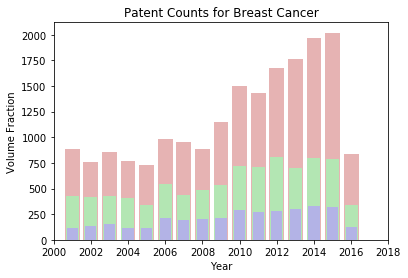

Caucasian Counts =  37998
African American Counts =  14579
Asian Counts =  5146
Hispanic Counts =  0
Native American Counts =  0
Unknown Counts =  75051
Total =  57723


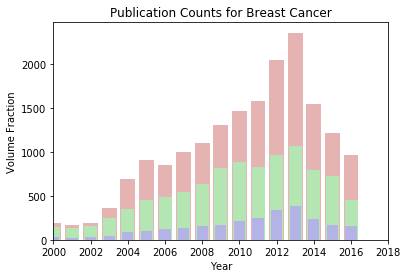

Caucasian Counts =  10320
African American Counts =  749
Asian Counts =  73
Hispanic Counts =  8
Native American Counts =  0
Unknown Counts =  1818
Total =  11150


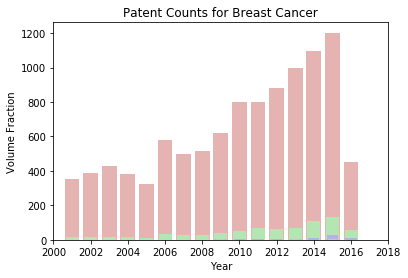

Caucasian Counts =  14950
African American Counts =  959
Asian Counts =  110
Hispanic Counts =  24
Native American Counts =  0
Unknown Counts =  2002
Total =  16043


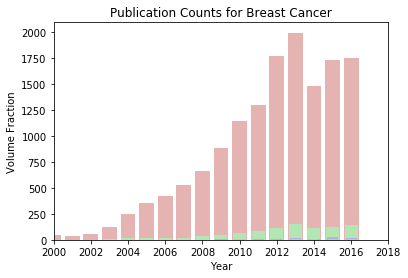

Caucasian Counts =  3569
African American Counts =  6
Asian Counts =  27
Hispanic Counts =  0
Native American Counts =  0
Unknown Counts =  145
Total =  3602


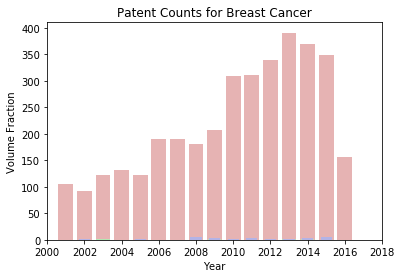

Caucasian Counts =  2488
African American Counts =  11
Asian Counts =  71
Hispanic Counts =  0
Native American Counts =  0
Unknown Counts =  310
Total =  2570


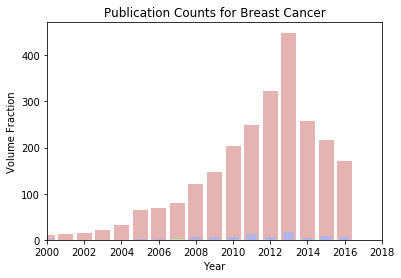

Caucasian Counts =  6949
African American Counts =  139
Asian Counts =  410
Hispanic Counts =  0
Native American Counts =  0
Unknown Counts =  15821
Total =  7498


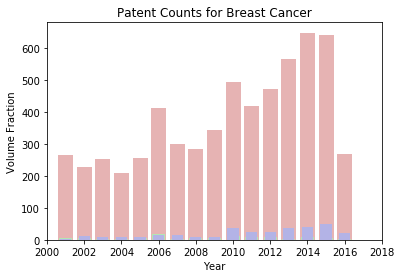

Caucasian Counts =  9235
African American Counts =  130
Asian Counts =  452
Hispanic Counts =  0
Native American Counts =  0
Unknown Counts =  19313
Total =  9817


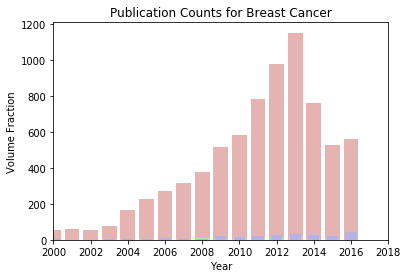

In [7]:
parse_counts("v01_PaCo.csv", "1", 2000, 2018, "Patent Counts for All Cancer Types")
parse_counts("v01_PuCo.csv", "1", 2000, 2018, "Publication Counts for Breast Cancer")
parse_counts("v01_PaCo.csv", "2", 2000, 2018, "Patent Counts for Breast Cancer")
parse_counts("v01_PuCo.csv", "2", 2000, 2018, "Publication Counts for Breast Cancer")
parse_counts("v01_PaCo.csv", "3", 2000, 2018, "Patent Counts for Breast Cancer")
parse_counts("v01_PuCo.csv", "3", 2000, 2018, "Publication Counts for Breast Cancer")
parse_counts("v01_PaCo.csv", "4", 2000, 2018, "Patent Counts for Breast Cancer")
parse_counts("v01_PuCo.csv", "4", 2000, 2018, "Publication Counts for Breast Cancer")